<a href="https://colab.research.google.com/github/MCRLdata-Sandbox/tutorials/blob/main/ML_hands_on_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

def multiply_by_two(x):
    # This function takes the slider value and multiplies it by 2
    print(f"Input: {x}, Result: {x * 2}")

# Create an interactive slider widget
interact(
    multiply_by_two,
    x=IntSlider(min=1, max=5, step=1, value=1, description="Input Slider")
)

interactive(children=(IntSlider(value=1, description='Input Slider', max=5, min=1), Output()), _dom_classes=('…

<function __main__.multiply_by_two(x)>

In [2]:
# Load Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# For plot grid layout
from matplotlib.gridspec import GridSpec

# 2. Load and check data
df1 = pd.read_csv("https://raw.githubusercontent.com/MCRLdata-Sandbox/tutorials/refs/heads/main/data/df1.csv")
print(df1.head())

               time_pst  p_co2_in_water_ppm  water_level_m_navd88  temp_deg_c  \
0  2023-08-15T03:00:00Z           292.96173              1.862493     15.3430   
1  2023-08-15T06:00:00Z           428.70242              1.743123     13.9817   
2  2023-08-15T09:00:00Z           470.66724              1.969583     12.6018   
3  2023-08-15T12:00:00Z           400.26240              1.402273     13.7009   
4  2023-08-15T15:00:00Z           435.01895              0.047133     13.4885   

   windspeed_avg_m_s  doy  month  hour  white_noise  
0              0.499  227      8     3    -0.419104  
1              1.324  227      8     6    -0.632978  
2              0.148  227      8     9    -0.243918  
3              0.000  227      8    12     0.912186  
4              2.431  227      8    15     0.106242  


               time_pst  p_co2_in_water_ppm  water_level_m_navd88  temp_deg_c  \
0  2023-08-15T03:00:00Z           292.96173              1.862493     15.3430   
1  2023-08-15T06:00:00Z           428.70242              1.743123     13.9817   
2  2023-08-15T09:00:00Z           470.66724              1.969583     12.6018   
3  2023-08-15T12:00:00Z           400.26240              1.402273     13.7009   
4  2023-08-15T15:00:00Z           435.01895              0.047133     13.4885   

   windspeed_avg_m_s  doy  month  hour  white_noise  
0              0.499  227      8     3    -0.419104  
1              1.324  227      8     6    -0.632978  
2              0.148  227      8     9    -0.243918  
3              0.000  227      8    12     0.912186  
4              2.431  227      8    15     0.106242  


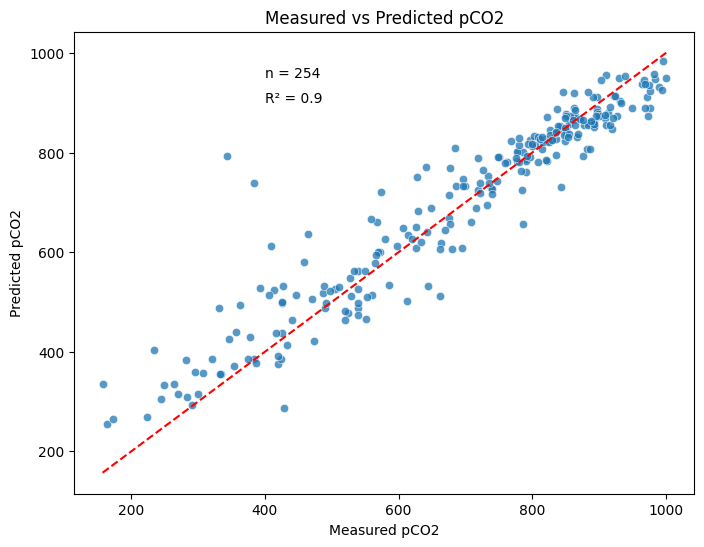

/tmp/ipython-input-3265227231.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['fi'] * 100, y=importance_df['predictor'], palette="viridis")


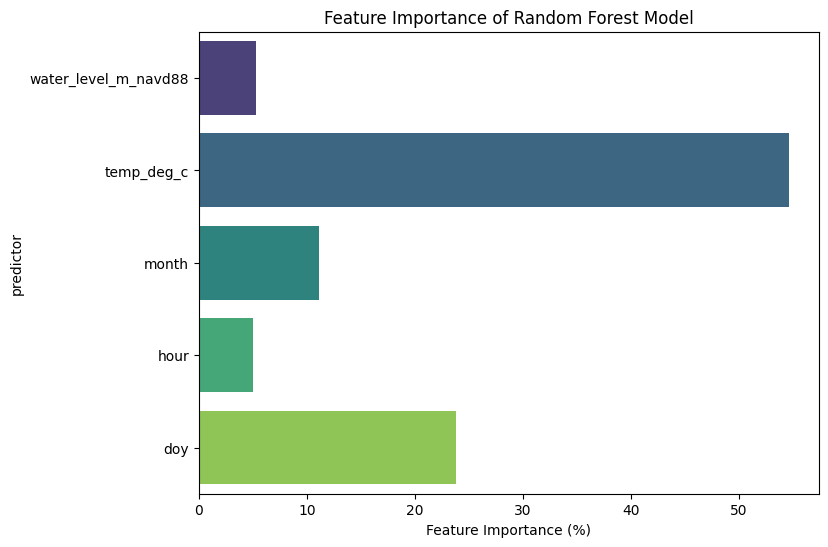

In [4]:
# Load Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# For plot grid layout
from matplotlib.gridspec import GridSpec

# 2. Load and check data
df1 = pd.read_csv("https://raw.githubusercontent.com/MCRLdata-Sandbox/tutorials/refs/heads/main/data/df1.csv")
print(df1.head())

# 3. Model fit function
def plot_rf_fit(model, test_data, features, target):
    # Predict on test data
    test_data['predicted'] = model.predict(test_data[features])

    # Calculate R-squared value
    r2 = r2_score(test_data[target], test_data['predicted'])

    # Create plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=test_data[target], y=test_data['predicted'], alpha=0.75)
    plt.plot([test_data[target].min(), test_data[target].max()],
             [test_data[target].min(), test_data[target].max()], linestyle="dashed", color="red")
    plt.annotate(f'R² = {round(r2, 2)}', (400, 900))
    plt.annotate(f'n = {test_data.shape[0]}', (400, 950))
    plt.xlabel("Measured pCO2")
    plt.ylabel("Predicted pCO2")
    plt.title("Measured vs Predicted pCO2")
    plt.show()

# 4. Model feature importance function
def plot_feature_importance(model, features):
    # Get feature importance
    importance = model.feature_importances_
    importance_df = pd.DataFrame({
        'predictor': features,
        'raw_fi': importance
    })

    # Convert importance to percentage and plot
    importance_df['fi'] = importance_df['raw_fi'] / importance_df['raw_fi'].sum()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=importance_df['fi'] * 100, y=importance_df['predictor'], palette="viridis")
    plt.xlabel("Feature Importance (%)")
    plt.title("Feature Importance of Random Forest Model")
    plt.show()

# 5. Make model function
def make_model(split_ratio, ntree, mtry):
    # Set seed for reproducibility
    np.random.seed(42)

    # Split data into train and test
    features = ["water_level_m_navd88", "temp_deg_c", "month", "hour", "doy"]
    target = "p_co2_in_water_ppm"
    train, test = train_test_split(df1, test_size=(1 - split_ratio), random_state=42)

    # Train Random Forest model
    model = RandomForestRegressor(
        n_estimators=ntree, max_features=mtry, random_state=42
    )
    model.fit(train[features], train[target])

    # Get predictions and plot R² fit
    plot_rf_fit(model, test.copy(), features, target)

    # Plot feature importance
    plot_feature_importance(model, features)

# Run make_model
make_model(0.7, 500, 2)